Correlation between dt and correlate(A, B) of two light curves A and B

* The higher the noise, the smaller the correlation
* The closer the window size is to dt, the smaller the correlation

Method used: We synthesized a bunch of unequally--spaced periodic light curves, added noise and windowing, then evaluated correlate on the result.

In [26]:
%pylab inline
import numpy as np
from scipy.signal import correlate, correlate2d
np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


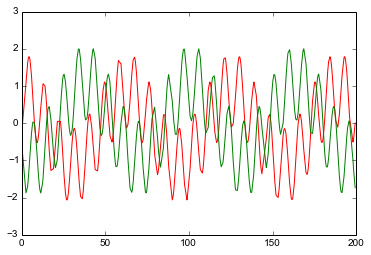

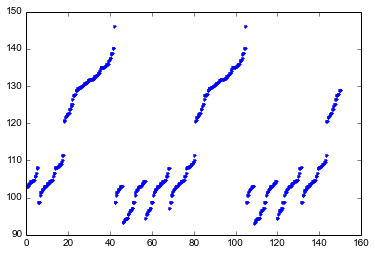

In [53]:
N = 500
b0 = 0.5
b1 = 1.0
Omega1 = 0.3
Omega2 = 0.4
sigma = 0.09

def mocksignal(t, b0, b1, Omega1, Omega2):
    return b0 + b1 * np.sin(Omega1 * t) * np.sin(Omega2 * t)

def mocknoise(sigma, N):
    return 0.0005*np.random.normal(0, sigma, N)

def norm(x):
    return (x - mean(x)) / std(x)

def observe(t, window_len):
    return where(floor((t / window_len) % 2) == 0)[0]
    
t = 200 * np.random.random(N)
t.sort()
#dts = np.array([-101.43, -0.934, 0.54, 45.7])
dts = np.linspace(0.1, 150, 500)
t_maxcorr = []
for dt in dts:
    sigA = mocksignal(t, b0, b1, Omega1, Omega2)# + mocknoise(sigma, N)
    sigB = mocksignal(t + dt , b0, b1, Omega1, Omega2)# + mocknoise(sigma, N)
    obs = observe(t, 20)
    tobs = t
#    tobs = t[obs]
#    sigA = sigA[obs]
#    sigB = sigB[obs]
    corr = correlate(sigA, sigB, mode='same')
    t_maxcorr.append(tobs[where(corr==max(corr))[0]])
plt.plot(tobs, norm(sigA), '-', color='r')
plt.plot(tobs, norm(sigB), '-', color='g')
plt.show()
#plt.plot(t, norm(corr), '-', color='b')
#    plt.title("DT: %s -- max_corr: %s" % (dt, t_maxcorr))
plt.plot(dts, array(t_maxcorr), '.')
plt.show()
    

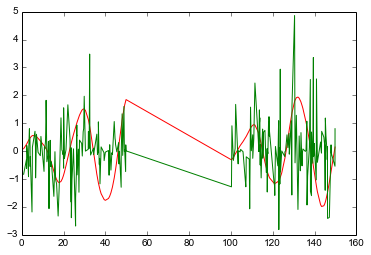

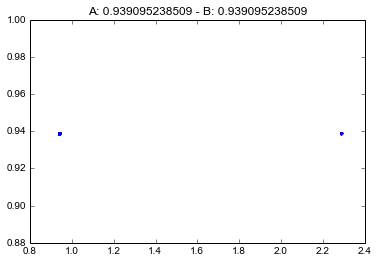

In [28]:
from statsmodels.tsa.stattools import acf

t_maxcorrA = array([])
t_maxcorrB = array([])
sigma = 100.
for dt in dts:
    sigA = (mocksignal(t, b0, b1, Omega1, Omega2) +
            10.5 * mocksignal(t, b0*random.random(), b1*random.random(), Omega1*random.random(), Omega2*random.random()))
    sigB = mocksignal(t + dt , b0, b1, Omega1, Omega2) + mocknoise(sigma, N)*mocknoise(sigma, N)
    obs = observe(t, 50)
    tobs = t[obs]
    sigA = sigA[obs]
    sigB = sigB[obs]
#    acorrA = correlate(sigA, sigA, mode='same')
#    acorrB = correlate(sigB, sigB, mode='same')
    acorrA = acf(sigA, unbiased=True)
    acorrB = acf(sigB, unbiased=True)
    t_maxcorrA = append(t_maxcorrA, tobs[where(acorrA==max(acorrA))[0]])
    t_maxcorrB = append(t_maxcorrB, tobs[where(acorrB==max(acorrB))[0]])
plt.plot(tobs, norm(sigA), '-', color='r')
plt.plot(tobs, norm(sigB), '-', color='g')
plt.show()
#plt.plot(t, norm(corr), '-', color='b')
#    plt.title("DT: %s -- max_corr: %s" % (dt, t_maxcorr))

plt.plot(t_maxcorrA, t_maxcorrB, '.')
plt.title("A: %s - B: %s"%(t_maxcorrA[0], t_maxcorrB[0]))
plt.show()
   

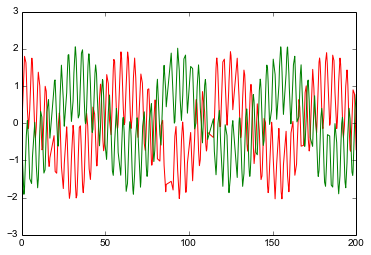

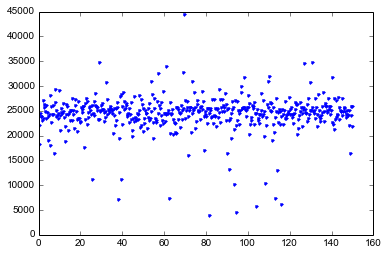

In [55]:
N = 500
b0 = 0.5
b1 = 1.0
Omega1 = 0.3
Omega2 = 0.4
sigma = 0.002

def mocksignal(t, b0, b1, Omega1, Omega2):
    return b0 + b1 * np.sin(Omega1 * t) * np.sin(Omega2 * t)

def mocknoise(sigma, N):
    return 0.0005 * np.random.normal(0, sigma, N)

def norm(x):
    return (x - mean(x)) / std(x)

def observe(t, window_len):
    return where(floor((t / window_len) % 2) == 0)[0]
    
t = 200 * np.random.random(N)
t.sort()
#dts = np.array([-101.43, -0.934, 0.54, 45.7])
dts = np.linspace(0.1, 150, 500)
t_maxcorr = []
for dt in dts:
    Omega1 = random.random()
    Omega2 = random.random()
    sigA = mocksignal(t, b0, b1, Omega1, Omega2)# + mocknoise(sigma, N)
    sigB = mocksignal(t + dt , b0, b1, Omega1, Omega2)# + mocknoise(sigma, N)
    obs = observe(t, 2)
    tobs = t
#    tobs = t[obs]
#    sigA = sigA[obs]
#    sigB = sigB[obs]
    obsA = zeros((len(tobs), 2))
    obsA[:,1] = tobs
    obsA[:,0] = sigA
    obsB = zeros((len(tobs), 2))
    obsB[:,1] = tobs
    obsB[:,0] = sigB
    corr = correlate2d(obsA, obsB, mode='same')
    t_maxcorr.append(corr[argmax(corr[:, 0]), 1])
plt.plot(tobs, norm(sigA), '-', color='r')
plt.plot(tobs, norm(sigB), '-', color='g')
plt.show()
#plt.plot(t, norm(corr), '-', color='b')
#    plt.title("DT: %s -- max_corr: %s" % (dt, t_maxcorr))
plt.plot(dts, array(t_maxcorr), '.')
plt.show()